- DATA471 - Assginment 4
- Name: Heba Aleterji

# Part 1:  EDA

### Import Library 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

### Reading dataset

Load two dataset CSV files into pandas DataFrames:
- (train-1.csv) for training and exvaluation the model 
- (test-1.csv) for testing model geeralization on unseen dta  

In [110]:
# Load the dataset
train_data = pd.read_csv('train-1.csv')
test_data = pd.read_csv('test-1.csv')

In [ ]:
# View the first few rows of the training data
# print(train_data.head())

### Data Discreption: 

In [113]:
# Check the info and data types
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6061 entries, 0 to 6116
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          6061 non-null   object        
 1   year_of_observation  6061 non-null   int64         
 2   insured_period       6061 non-null   float64       
 3   residential          6061 non-null   int64         
 4   building_painted     6061 non-null   object        
 5   building_fenced      6061 non-null   object        
 6   garden               6054 non-null   object        
 7   settlement           6061 non-null   object        
 8   building_dimension   5959 non-null   float64       
 9   building_type        6061 non-null   int64         
 10  date_of_occupancy    5603 non-null   datetime64[ns]
 11  number_of_windows    6061 non-null   object        
 12  geo_code             5963 non-null   object        
 13  claim                6061 non-nul

- **Dataset contain 13 variables,** 7 continuios variables and 6 categorical variables.
- **Categorical Columns are:** customer_id, building_painted, building_fenced, garden, settlement, number_of_windows
- **Numerical Columns:** year_of_observation, insured_period, residential, building_dimension, building_type, date_of_occupancy, claim

### Convert Wrong Data Type:

In [112]:
import pandas as pd

# Assuming train_data is a pandas DataFrame

# Function to check if a value can be converted to an integer
def is_integer(value):
    try:
        int(value)
        return True
    except ValueError:
        return False

# Function to check if a value can be converted to a float
def is_float(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

# Remove rows with invalid data in the 'number_of_windows' column
#train_data = train_data[train_data['number_of_windows'].apply(is_integer)]

# Convert the 'number_of_windows' column to an integer data type
#train_data['number_of_windows'] = train_data['number_of_windows'].astype(int)

# Convert the 'date_of_occupancy' column to a datetime data type
train_data['date_of_occupancy'] = pd.to_datetime(train_data['date_of_occupancy'], errors='coerce')

# Remove rows with invalid data in the 'geo_code' column
train_data = train_data[train_data['geo_code'].apply(is_float)]

### Variable Data Type: 
- The code below used to print the unique value for each variables.

In [114]:
# Assuming train_data is a pandas DataFrame
for column in train_data.columns:
    unique_values = train_data[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print("-" * 40)

Column: customer_id
Unique Values: ['H14663' 'H2037' 'H3802' ... 'H5926' 'H6537' 'H7470']
----------------------------------------
Column: year_of_observation
Unique Values: [2013 2015 2014 2012]
----------------------------------------
Column: insured_period
Unique Values: [1.         0.24109589 0.84383562 0.08493151 0.85753425 0.29589041
 0.         0.91506849 0.98630137 0.16164384 0.99726027 0.09589041
 0.66575343 0.89315069 0.58082192 0.83287671 0.26027397 0.7479452
 0.41803279 0.10410959 0.76986301 0.02465753 0.47671233 0.86575342
 0.55464481 0.44808743 0.50273224 0.46849315 0.79726027 0.31506849
 0.59452055 0.74863388 0.17534247 0.11780822 0.12054795 0.49589041
 0.91530055 0.48087432 0.78082192 0.02191781 0.24863388 0.69589041
 0.94794521 0.50410959 0.82739726 0.52054795 0.58196721 0.16393443
 0.86885246 0.83606557 0.98356164 0.24657534 0.79178082 0.19452055
 0.41643836 0.95342466 0.41369863 0.25205479 0.80273973 0.38356164
 0.96721311 0.91780822 0.25136612 0.15068493 0.48493151 

### Imbalance dataset: 
Check imbalabnce in dataset, by count the number of samples for each target class


In [115]:
import numpy as np
for c in np.unique(train_data['claim']):
    print('{%d : %d}' % (c, sum(train_data['claim']==c)))

{0 : 4656}
{1 : 1405}


- As you can see in the result, there 4698 with class 0. while class 1 account 1419 instances.
- Thus, the dataset has imbalance issue.

### Descreptive:

- Ckech data range for each variables.

In [116]:
# Summary statistics for numerical columns
print(train_data.describe())

       year_of_observation  insured_period  residential  building_dimension  \
count          6061.000000     6061.000000   6061.00000         5959.000000   
mean           2013.269757        0.906757      0.31282         1869.373888   
std               1.075373        0.243540      0.46368         2268.164169   
min            2012.000000        0.000000      0.00000            1.000000   
25%            2012.000000        1.000000      0.00000          520.000000   
50%            2013.000000        1.000000      0.00000         1065.000000   
75%            2014.000000        1.000000      1.00000         2255.000000   
max            2015.000000        1.000000      1.00000        20940.000000   

       building_type        claim  
count    6061.000000  6061.000000  
mean        2.182808     0.231810  
std         0.939371     0.422023  
min         1.000000     0.000000  
25%         2.000000     0.000000  
50%         2.000000     0.000000  
75%         3.000000     0.000000  


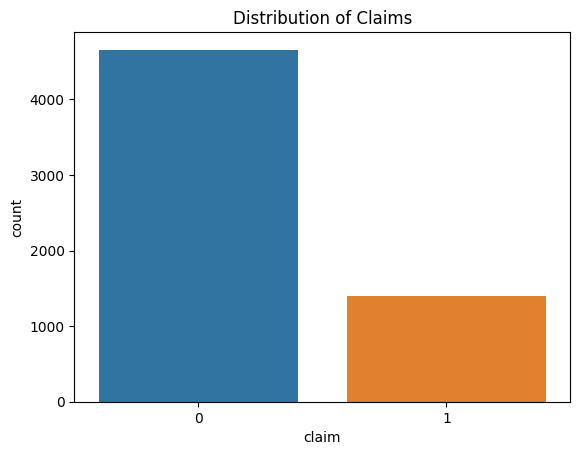

In [117]:
# Plot the distribution of the target variable
sns.countplot(x='claim', data=train_data)
plt.title('Distribution of Claims')
plt.show()

- Convert categorical columns

In [119]:
# Convert categorical columns to category type
categorical_columns = ['residential', 'building_painted', 'building_fenced', 'garden', 'settlement', 'building_type']

for col in categorical_columns:
    train_data[col] = train_data[col].astype('category')

# Convert 'geo_code' to categorical if it's categorical
# train_data['geo_code'] = train_data['geo_code'].astype('category')

# Convert 'claim' column to categorical data type
# train_data['claim'] = train_data['claim'].astype('category')

- Check Variables types

In [120]:
# Verify data types to make sure all categorical columns are strings
print(train_data.dtypes)

customer_id                    object
year_of_observation             int64
insured_period                float64
residential                  category
building_painted             category
building_fenced              category
garden                       category
settlement                   category
building_dimension            float64
building_type                category
date_of_occupancy      datetime64[ns]
number_of_windows              object
geo_code                       object
claim                           int64
dtype: object


### Missing Value: 

- Check missing for each variables.

In [52]:
# Check for missing values in each column
print(train_data.isnull().sum())

customer_id              0
year_of_observation      0
insured_period           0
residential              0
building_painted         0
building_fenced          0
garden                   7
settlement               0
building_dimension     102
building_type            0
date_of_occupancy      459
number_of_windows        0
geo_code                98
claim                    0
dtype: int64


- Plot misssing Value for each variable

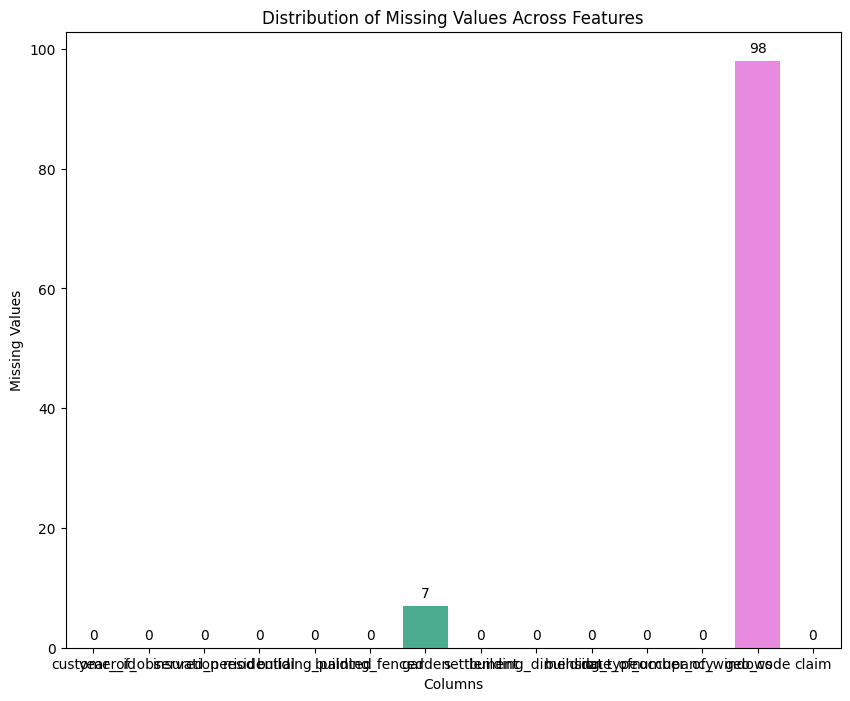

In [45]:
# Check for missing values
missing_values = train_data.isnull().sum()

# Create a DataFrame for plotting
missing_df = pd.DataFrame({
    'Columns': missing_values.index,
    'Missing Values': missing_values.values
})

# Plot the missing values
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x='Columns', y='Missing Values', data=missing_df)
plt.title('Distribution of Missing Values Across Features')
# Annotate each bar with the count of missing values
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9), textcoords = 'offset points')
plt.show()

- **As the information above, found missing data into Four columns building_dimension, date_of_occupancy, garden and geo_code.**

    - For (building_dimension) column, there are 102 missing value of 6117.
    - For (date_of_occupancy) column, there are 459 missing value of 6117.
    - For (garden) column, there are 7 missing value of 6117.
    - for (geo_code) column, there are 98 missing value of 6117.

#### Impute Missing Value:

- Impute Numrerical variables

In [39]:
# Fill missing numeric values with the mean of the numeric columns
numeric_columns = train_data.select_dtypes(include=['number']).columns
train_data[numeric_columns] = train_data[numeric_columns].fillna(train_data[numeric_columns].mean())


- Impute Categorical variables

In [104]:
# Fill missing categorical values with the most frequent value (mode)
categorical_columns = train_data.select_dtypes(include=['category', 'object']).columns
train_data[categorical_columns] = train_data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

In [ ]:
# Check for missing values in each column
print(train_data.isnull().sum())

### Correlation: 

- Compute the correlation matrix

In [121]:
# Step 1: Compute the correlation matrix
correlation_matrix = train_data.corr()['claim']

print(correlation_matrix)

# Visualize the correlation matrix
#plt.figure(figsize=(10, 8))  # Set the figure size
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
#plt.title('Correlation Matrix Heatmap')
#plt.show()

year_of_observation   -0.001458
insured_period         0.089378
building_dimension     0.297562
claim                  1.000000
Name: claim, dtype: float64


C:\Users\Engbo\AppData\Local\Temp\ipykernel_27720\1708024395.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()['claim']


# Part 2:  MODELING: 

- **Logistic Regression:** linear model that predicts the probability of a binary outcome
    - Linearly separable data: Logistic regression performs well when the data is linearly separable
    - The relationship between the features and target is likely linear

- **Support Vector Machine (SVM):** is a powerful classification algorithm that aims to find the hyperplane that maximizes the margin between two classes.
    - It can handle both linear and non-linear relationships.
    - Feature scaling: is necessary before applying the model.
    - Class imbalance: is necessary to fix class imbalance before apply SMV model.

- **Random Forest:** is an ensemble learning algorithm that builds multiple decision trees and aggregates their predictions.
    - Random Forest can model complex, non-linear decision boundaries.
    - Feature importance: Random Forest provides a way to measure feature importance.
    - Handling missing data: Random Forest can handle missing data in the input features and can also deal with categorical features directly.
    - Imbalanced data: Random Forest can be sensitive to class imbalances

- **DecisionTree:** DT algorithm can be effectively used for a binary classification task
    - Decision Trees are non-linear models that can capture complex relationships between features and the target variable.
    - Decision Trees are well-suited for binary-classification problem, as they can iteratively split the data until each node corresponds to a specific class.
    - No Need for Feature Scaling.
    - Handling Missing Values: Decision Trees can handle missing values relatively well by splitting based on available information.

### 1. Spliting Dataset

- Splits the Training dataset into training and validation sets using the train_test_split

In [122]:
# Split the data into training and validation sets
X = train_data.drop(columns=['claim'])
y = train_data['claim']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### 2. Baseline Model 

- **Pipline:** the pipline include three process, which are:

    1. **Impute Missing Value:** Impute missing data.
    2. **Data Normalizing:** Normalize data.
    3. **Model Fitting:** Use LogisticRegression as base model.

- **Evaluate Model:**

In [140]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Initialize and train Logistic Regression
#baseline_model = LogisticRegression(class_weight='balanced')
baseline_pipline = Pipeline([
    ('impute_missing', SimpleImputer(strategy='mean')),
    ('scaller', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced'))
])

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(baseline_pipline, X_train[['building_dimension','building_type']], y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))
# baseline_model.fit(X_train, y_train)

# Make predictions on the validation set
#y_pred_proba = baseline_model.predict_proba(X_val)[:, 1]

# Calculate AUC-ROC
#auc_baseline = roc_auc_score(y_val, y_pred_proba)
#print(f'Baseline Model AUC-ROC: {auc_baseline:.4f}')

# Fit the pipeline on the entire training data
baseline_pipline.fit(X_train[['building_dimension', 'building_type']], y_train)

# Predict probabilities on the test data
base_pred_proba = baseline_pipline.predict_proba(X_val[['building_dimension', 'building_type']])[:, 1]

# Evaluate the model using ROC AUC score
roc_auc = roc_auc_score(y_val, base_pred_proba)
print('Test ROC AUC: %.3f' % roc_auc)

Mean ROC AUC: 0.699
Test ROC AUC: 0.726


### 3. Improved Model

- **Pipline:** the pipline include three process, which are:
    1. **Impute Missing Value:** Impute missing data.
    2. **Data Normalizing:** Normalize data.
    3. **Model Fitting:** Use RandomForest as improved model.

- Evaluate model

In [138]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, cross_val_score


improved_pipline = Pipeline([
    ('impute_missing', SimpleImputer(strategy='mean')),
    ('scaller', StandardScaler()),
    ('model', RandomForestClassifier(class_weight='balanced'))
])

# Define the parameter grid
param_grid = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

# Set up the cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator= improved_pipline, param_grid=param_grid, scoring='roc_auc', cv=cv, n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train[['building_dimension', 'building_type']], y_train)

# Use the best estimator to predict probabilities on the validation data
best_pipeline = grid_search.best_estimator_
improved_pred_proba = best_pipeline.predict_proba(X_val[['building_dimension', 'building_type']])[:, 1]

# Predict class labels on the validation data
improved_pred_labels = best_pipeline.predict(X_val[['building_dimension', 'building_type']])

# EVALUATION: Evaluate the model using ROC AUC score.
roc_auc = roc_auc_score(y_val, improved_pred_proba)
print('Test ROC AUC: %.3f' % roc_auc)

# EVALUATION: Evaluate the model using three metrics, which are Precision, Recall, and F1 Score.
precision = precision_score(y_val, improved_pred_labels)
recall = recall_score(y_val, improved_pred_labels)
f1 = f1_score(y_val, improved_pred_labels)

print('Test Precision: %.3f' % precision)
print('Test Recall: %.3f' % recall)
print('Test F1 Score: %.3f' % f1)

# Print the best parameters and the best ROC AUC score from Grid Search
print('Best Parameters:', grid_search.best_params_)
print('Best ROC AUC from Grid Search: %.3f' % grid_search.best_score_)

Test ROC AUC: 0.666
Test Precision: 0.385
Test Recall: 0.469
Test F1 Score: 0.423
Best Parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Best ROC AUC from Grid Search: 0.651
